<a href="https://colab.research.google.com/github/bulajicandjela/PPPO/blob/main/AndjelaBulajicT11g2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Klasifikacija slika**

## **Uvod**
Klasifikacija je proces organizovanja informacija u kategorije ili klase tako da se podaci mogu jasnije analizirati ili razumeti. 

Klasifikacija fotografija predstavlja nadgledani zadatak mašinskog učenja dodeljivanja oznake ulaznoj fotografiji iz fiksnog skupa oznaka. Odnosi se na postupak dodeljivanja oznake fotografiji na osnovu njenog vizuelnog sadržaja.

Postoje četiri osnovne vrste klasifikacije:

Binary classification- zadaci klasifikacije u kojima postoje dve moguće klase 

Multi-class classification - zadaci klasifikacije u kojima postoji više mogućih klasa od kojih se jedna dodeljuje instanci 

Multi-label classification - zadaci klasifikacije u kojima postoji dve ili više klasa od kojih jedna ili više njih mogu da budu dodeljeni instanci 

Imbalanced classificaton - odnosi se na klasifikacione zadatke nad setom podataka u kom je broj instanci različitih klasa neravnomerno raspoređen. 

Moj zadatak je klasifikacija figurica na osnovu slike njenog izgleda. Svaka instanca pripada jednoj od više mogućih klasa, pa je u pitanju multi-class klasifikacija.

# **Pandas**
Pandas predstavlja brzu i fleksibilnu open source biblioteku za Python programski jezik koja pruža visoke performanse za ceo proces analize podataka na jednostavan i intuitivan način. 
Ima cilj da postane jedna od najmoćnijih i najfleksibilnijih open source alata za analizu i manipulaciju podataka. Namenjena je za sve Python korisnike koji žele da rade sa podacima i koriste moćan alat za to.
Pored biblioteka Matplotlib i NumPy, Pandas je jedna od najkorišćenijih kada je u pitanju data science oblast. 

# **NumPy**
NumPy je biblioteka za programski jezik Python, koja dodaje podršku za velike, višedimenzionalne nizove i matrice, zajedno sa velikom kolekcijom matematičkih funkcija na visokom nivou za rad na tim nizovima. NumPy je softver otvorenog koda i ima mnogo saradnika.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Učitavanje podataka
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/jedan/index.csv')
#Pregled kako izgledaju učitani podaci
data.head(10)

,path,class_id
0,marvel/0001/001.jpg,1
1,marvel/0001/002.jpg,1
2,marvel/0001/003.jpg,1
3,marvel/0001/004.jpg,1
4,marvel/0001/005.jpg,1
5,marvel/0001/006.jpg,1
6,marvel/0001/007.jpg,1
7,marvel/0001/008.jpg,1
8,marvel/0001/009.jpg,1
9,marvel/0001/010.jpg,1


In [ ]:
#Broj redova i kolona
data.shape

(342, 2)

# **OpenCV**
OpenCV (engl. Open Source Computer Vision) je biblioteka programskih funkcija, uglavnom u realnom vremenu, prvobitno razvijena u Intelovom istraživačkom centru. Biblioteka je međuplatformska, omogućeno korišćenje biblioteke različitim softverima, besplatna za korišćenje pod open-source BSD lincecom.

# **Matplotlib**
Matplotlib je biblioteka za programski jezik Pajton i to je brojna matematika produžena NumPy -u . Ona daje objektno- orijentisani API  za ugrađivanje parcela u aplikacije koje se koriste u opšte svrhe GUI matrerijala kao wxPython, Qt, ili GTK +. Takođe postoji proceduralna pristupna Pajton biblioteka bazirana na državnim mašinerijama (kao OpenGL), tako da blisko podseća na MATLAB. SciPy koristi matplotlib.

In [ ]:
import cv2 #importuje OpenCV
import matplotlib.pyplot as plt

In [ ]:
#Importovanje slika iz foldera kao NumPy nizova
for path in data['path']:
    img = cv2.imread(str('/content/drive/MyDrive/Colab Notebooks/jedan/'+'/'+path))
    #plt.imshow(img)
    print(np.array(img))
#Normalizacija niza
    print(np.array(img)/255)
    break

[[[ 68  85  94]
  [ 68  85  94]
  [ 70  87  96]
  ...
  [123 140 143]
  [121 138 141]
  [120 137 140]]

 [[ 71  89  96]
  [ 71  89  96]
  [ 73  90  99]
  ...
  [124 141 144]
  [123 140 143]
  [123 140 143]]

 [[ 76  94 101]
  [ 75  93 100]
  [ 78  95 104]
  ...
  [125 142 145]
  [125 142 145]
  [125 142 145]]

 ...

 [[ 60  70  80]
  [ 51  61  71]
  [ 47  58  66]
  ...
  [120 132 134]
  [126 139 141]
  [117 130 132]]

 [[ 56  66  76]
  [ 46  56  66]
  [ 42  53  61]
  ...
  [121 134 136]
  [117 130 132]
  [121 134 136]]

 [[ 49  59  69]
  [ 43  53  63]
  [ 46  57  65]
  ...
  [113 126 128]
  [116 128 132]
  [118 130 134]]]
[[[0.26666667 0.33333333 0.36862745]
  [0.26666667 0.33333333 0.36862745]
  [0.2745098  0.34117647 0.37647059]
  ...
  [0.48235294 0.54901961 0.56078431]
  [0.4745098  0.54117647 0.55294118]
  [0.47058824 0.5372549  0.54901961]]

 [[0.27843137 0.34901961 0.37647059]
  [0.27843137 0.34901961 0.37647059]
  [0.28627451 0.35294118 0.38823529]
  ...
  [0.48627451 0.5529411

In [ ]:
#Učitavanje svih slika, resize tih slika, skaliranje, 
X = []
y = []

for path in data['path']:
    img = cv2.imread(str('/content/drive/MyDrive/Colab Notebooks/jedan'+'/'+path))
    #print(img)
    resized_img = cv2.resize(img,(224,224))
    #print(resized_img)
    scaled_img = np.array(resized_img)/255
    X.append(scaled_img)
    
y = np.array(data['class_id'])-1

In [ ]:
#U ove promenljive smestamo NumPy nizove
X = np.array(X)
y = np.array(y)

In [ ]:
#Proveravamo kako izgleda
X[0]

array([[[0.2745098 , 0.34117647, 0.37254902],
        [0.28235294, 0.34901961, 0.38823529],
        [0.28235294, 0.34901961, 0.38431373],
        ...,
        [0.48235294, 0.54901961, 0.56078431],
        [0.48235294, 0.54901961, 0.56470588],
        [0.47843137, 0.54509804, 0.55686275]],

       [[0.29411765, 0.36470588, 0.39215686],
        [0.31372549, 0.38431373, 0.41176471],
        [0.30980392, 0.37647059, 0.41176471],
        ...,
        [0.48627451, 0.55294118, 0.56470588],
        [0.49411765, 0.56078431, 0.57254902],
        [0.49019608, 0.55686275, 0.56862745]],

       [[0.32156863, 0.39215686, 0.41960784],
        [0.31372549, 0.38431373, 0.41176471],
        [0.30588235, 0.37647059, 0.40392157],
        ...,
        [0.48627451, 0.55294118, 0.56470588],
        [0.50196078, 0.56862745, 0.58039216],
        [0.49019608, 0.55686275, 0.56862745]],

       ...,

       [[0.23529412, 0.27058824, 0.30980392],
        [0.2627451 , 0.29803922, 0.3372549 ],
        [0.23921569, 0

# **Scikit-learn i model selection**
Scikit-learn je besplatna biblioteka za mašinsko učenje za Python. Sadrži različite algoritme kao što su vektorska mašina za podršku, slučajne šume i k-susedi, a podržava i Python numeričke i naučne biblioteke poput NumPy i SciPy.

Model_selection je metoda za postavljanje nacrta za analizu podataka, a zatim se koristi za merenje novih podataka. Odabir odgovarajućeg modela omogućava nam generisanje tačnih rezultata prilikom predviđanja. Da bismo to uradili, morate da obučite svoj model pomoću određenog skupa podataka.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [ ]:
print(f'train size : {x_train.shape}')
print(f'test size : {x_test.shape}')

train size : (256, 224, 224, 3)
test size : (86, 224, 224, 3)


# **TensorFlow i Keras**
TensorFlow je biblioteka otvorenog koda otvorena za Python za numerička izračunavanja koja čini automatsko učenje bržim i lakšim. TensorFlow dozvoljava programerima da kreiraju grafičke strukture podataka koji opisuju kako se podaci kreću kroz grafikon ili seriju procesnih čvorova.

Keras je softverska biblioteka otvorenog koda koja pruža Python interfejs za veštačke neuronske mreže. Keras je zapravo interfejs za biblioteku TensorFlow.



# **Sekvencijalni model**
Sekvencijalni model je pogodan za običan niz slojeva gde svaki sloj ima tačno jedan ulazni tenzor i jedan izlazni tenzor.

In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential

# **Data augmentation**
Data(image) augmentation je tehnika menjanja postojećih podataka kako bi se stvorili još neki podaci za proces obuke modela. Drugim rečima, to je proces veštačkog proširenja dostupnog skupa podataka za obuku modela dubokog učenja.

In [ ]:

data_augmentation = Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',input_shape = (224,224,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

In [ ]:
#Gledamo koliko ima klasa i da li su jedinstvene
print(len(data['class_id'].value_counts()))
print(len(data['class_id'].unique()))

35
35


In [ ]:
#Pravimo promenljivu za broj klasa
num_classes = len(data['class_id'].value_counts())

# **Kreiranje modela**
Model koji kreiramo se sastoji od tri konvoluciona bloka sa maksimalnim slojem bazena u svakom od njih. Postoji potpuno povezan sloj sa 128 jedinica na vrhu koji se aktivira pomoću funkcije relu aktivacije. 

In [ ]:

#Kreiramo model
model = Sequential([
    data_augmentation,
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes),
])

Izabrala sam optimizers.Adam optimizator and losses.SparseCategoricalCrossentropy loss funkciju. Da bismo videli tačnost obuke i validaciju za svaku epohu obuke, prosleđujemo argument metrics.

In [ ]:
#Kompajliranje modela
model.compile(
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
optimizer = 'adam',
metrics = ['accuracy'],
)

In [ ]:
#Obučavamo model za fiksni broj epoha (iteracije u skupu podataka). 
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,verbose=2)

Epoch 1/50
8/8 - 30s - loss: 4.3392 - accuracy: 0.0312 - val_loss: 3.5624 - val_accuracy: 0.0349
Epoch 2/50
8/8 - 27s - loss: 3.5468 - accuracy: 0.0312 - val_loss: 3.5858 - val_accuracy: 0.0116
Epoch 3/50
8/8 - 27s - loss: 3.5473 - accuracy: 0.0352 - val_loss: 3.5865 - val_accuracy: 0.0116
Epoch 4/50
8/8 - 27s - loss: 3.5303 - accuracy: 0.0352 - val_loss: 3.5779 - val_accuracy: 0.0233
Epoch 5/50
8/8 - 27s - loss: 3.5331 - accuracy: 0.0547 - val_loss: 3.5599 - val_accuracy: 0.0349
Epoch 6/50
8/8 - 27s - loss: 3.5122 - accuracy: 0.0781 - val_loss: 3.6115 - val_accuracy: 0.0349
Epoch 7/50
8/8 - 27s - loss: 3.4595 - accuracy: 0.0625 - val_loss: 3.5701 - val_accuracy: 0.0349
Epoch 8/50
8/8 - 27s - loss: 3.4246 - accuracy: 0.0742 - val_loss: 3.6410 - val_accuracy: 0.0233
Epoch 9/50
8/8 - 27s - loss: 3.3882 - accuracy: 0.0859 - val_loss: 3.4965 - val_accuracy: 0.0930
Epoch 10/50
8/8 - 27s - loss: 3.2370 - accuracy: 0.1602 - val_loss: 3.4416 - val_accuracy: 0.0814
Epoch 11/50
8/8 - 28s - loss:

In [ ]:
#Kreiramo novi model koji će biti poboljšanje prethodnog
model_1 = tf.keras.applications.DenseNet121()
base_input = model_1.layers[0].input
base_output = model_1.layers[-2].output
output = layers.Dense(num_classes,activation='softmax')(base_output)
new_model = keras.Model(inputs = base_input,outputs = output)
print(new_model.summary())

33202176/33188688 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_____________________________

In [ ]:
#Kompajliramo novi model
new_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),optimizer ='adam',metrics=['accuracy'])

In [ ]:
#Treniramo novi model, ovog puta nam je potrebno manje epoha
new_model.fit(x_train,y_train,epochs = 20,validation_data=(x_test,y_test))

Epoch 1/20
8/8 [==============================] - 212s 25s/step - loss: 2.6990 - accuracy: 0.3281 - val_loss: 3.4120 - val_accuracy: 0.2326
Epoch 2/20
8/8 [==============================] - 195s 25s/step - loss: 0.4566 - accuracy: 0.9336 - val_loss: 7.1330 - val_accuracy: 0.1279
Epoch 3/20
8/8 [==============================] - 193s 24s/step - loss: 0.1059 - accuracy: 0.9883 - val_loss: 7.5962 - val_accuracy: 0.1628
Epoch 4/20
8/8 [==============================] - 194s 24s/step - loss: 0.0263 - accuracy: 1.0000 - val_loss: 6.1407 - val_accuracy: 0.1744
Epoch 5/20
8/8 [==============================] - 193s 24s/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 4.7017 - val_accuracy: 0.2326
Epoch 6/20
8/8 [==============================] - 192s 24s/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 3.8044 - val_accuracy: 0.2907
Epoch 7/20
8/8 [==============================] - 192s 24s/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 3.1218 - val_accuracy: 0.3256
Epoch 8/20
8/8 [====

# **Testiranje finalnog modela**

minifigure name : YODA


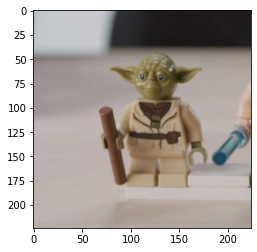

In [ ]:
#Provera novog modela
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/jedan/test/013.jpg') #Ponavljati ovu liniju za različite slike koje želimo da proverimo
#read the image 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, dsize=(224,224))/255
plt.imshow(image)
image = np.reshape(image,(1,224,224,3))
ans = new_model.predict(image).argmax()
ans = ans+1
metadata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/jedan/metadata.csv')
name = metadata['minifigure_name'][metadata['class_id']==ans].iloc[0]
print(f'minifigure name : {name}')

# **Zaključak**
CNN važi za jedan od najboljih algoritama u oblasti klasifikacije slika i iz tog razloga je izabran u ovom projektu. Kreirani model sa velikom uspešnošću rešava zadati problem.


# **Literatura**
1. https://www.tensorflow.org/tutorials/images/classification
2. https://desktop.arcgis.com/en/arcmap/latest/extensions/spatial-analyst/image-classification/what-is-image-classification-.htm
3. https://keras.io/
4. https://numpy.org/
5. https://pandas.pydata.org/
6. https://opencv.org/
7. https://matplotlib.org/
8. https://scikit-learn.org/stable/
9. https://keras.io/guides/sequential_model/



